In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# CSV 파일 불러오기
nsl_kdd_df = pd.read_csv('/content/Dummy_NSL-KDD_Data (1).csv')
malicious_websites_df = pd.read_csv('/content/Dummy_Malicious_Websites_Data (1).csv')
wifi_fingerprinting_df = pd.read_csv('/content/Dummy_WiFi_Fingerprinting_Data (2).csv')
user_data_df = pd.read_csv('/content/user_data_with_credential.csv', encoding='EUC-KR')

In [9]:
# WiFi Fingerprinting 데이터의 첫 5줄 확인
print(wifi_fingerprinting_df.head())

# 모든 열 이름 확인
print(wifi_fingerprinting_df.columns)


          r1         r2         r3         r4          x          y  \
0 -96.120055 -27.973208  -8.642199 -62.635918  53.303056  65.430632   
1 -81.322747 -31.271700 -47.463952 -66.708790  13.789882   8.003257   
2 -16.875419 -90.424580 -27.508973 -82.384609  59.124291  24.232981   
3 -23.323164  -7.742760 -56.395170 -39.273333  31.478562  77.367935   
4 -64.935731 -43.152780 -36.996542 -52.337584   5.234877  52.868585   

             timestamp  
0  2024-01-01 00:00:00  
1  2024-01-01 00:01:00  
2  2024-01-01 00:02:00  
3  2024-01-01 00:03:00  
4  2024-01-01 00:04:00  
Index(['r1', 'r2', 'r3', 'r4', 'x', 'y', 'timestamp'], dtype='object')


In [10]:
# 임의로 안전성 레이블 추가 (신호 강도에 기반한 가정)
wifi_fingerprinting_df['safety_label'] = wifi_fingerprinting_df.apply(
    lambda row: 1 if row['r1'] > -50 and row['r2'] > -50 and row['r3'] > -50 and row['r4'] > -50 else 0,
    axis=1
)

# 결과 확인
print(wifi_fingerprinting_df.head())


          r1         r2         r3         r4          x          y  \
0 -96.120055 -27.973208  -8.642199 -62.635918  53.303056  65.430632   
1 -81.322747 -31.271700 -47.463952 -66.708790  13.789882   8.003257   
2 -16.875419 -90.424580 -27.508973 -82.384609  59.124291  24.232981   
3 -23.323164  -7.742760 -56.395170 -39.273333  31.478562  77.367935   
4 -64.935731 -43.152780 -36.996542 -52.337584   5.234877  52.868585   

             timestamp  safety_label  
0  2024-01-01 00:00:00             0  
1  2024-01-01 00:01:00             0  
2  2024-01-01 00:02:00             0  
3  2024-01-01 00:03:00             0  
4  2024-01-01 00:04:00             0  


In [11]:
# 데이터 분리
X_wifi = wifi_fingerprinting_df.drop(['safety_label', 'timestamp'], axis=1)
y_wifi = wifi_fingerprinting_df['safety_label']

# 학습 및 평가를 위한 데이터 분할
X_train_wifi, X_test_wifi, y_train_wifi, y_test_wifi = train_test_split(X_wifi, y_wifi, test_size=0.2, random_state=42)

# RandomForestClassifier를 사용하여 모델 학습
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_wifi, y_train_wifi)

# 테스트 데이터로 예측
wifi_preds = rf_classifier.predict(X_test_wifi)

# 간단한 평가
from sklearn.metrics import classification_report

print(classification_report(y_test_wifi, wifi_preds))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       195
           1       1.00      1.00      1.00         5

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



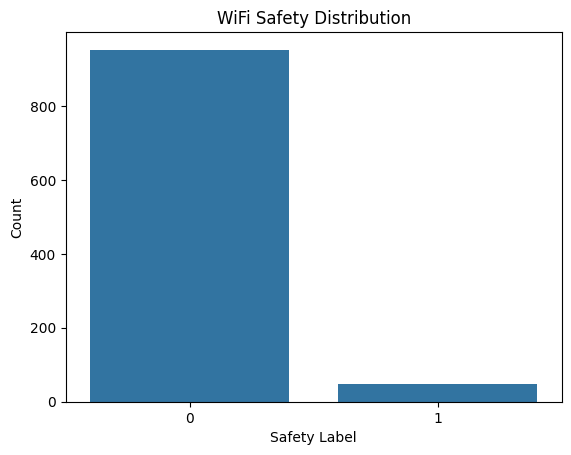

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 안전성 분포 시각화
sns.countplot(x='safety_label', data=wifi_fingerprinting_df)
plt.title("WiFi Safety Distribution")
plt.xlabel("Safety Label")
plt.ylabel("Count")
plt.show()
